## <h2><center> Different types of Scotch Whisky and its reviews </center></h2>

<br>

# 1. Introduction

I know the Topic of the report is little bit odd and also there will be lot of questions in mind that why this Dataset only and what all problems it solves and lot more but everthing will be cleared soon. 
So the project domain is Whisky which is the most popular liqour in the world. Almost everyone likes whisky, It is a dark spirit which is made from variety of grains and then distilled.
The Revenue generated by the whisky segment worldwide amounts to US$91.14bn in 2022, Also the market is expected to grow anually by 6.15% CAGR [1] [Source mentioned in the reference].

This project will help the comapy and other vendors to boost there sales and help them in having a good inventory and also having variety of inventory which can be sold easily also everyone gets what they want.

So In this Project we will be using Clustering Algorithms as they can be used to find patterns in the large dataset. We will also be using EDA and a predictive case of Logistic regression. In Breif we will be doing following things.

**1. Using the dataset from the Kaggle which was scrapped from Top whisky website for our analysis. [2]**

**2. Installing Libraries and Data Preprocessing & Cleaning**

**3. Basic EDA on Whisky reviews.**

**4. WordClouds**

**5. K-Means Clusttering**

**6. Logistic Regression**

**7. Final Result**






<br>

In [1]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [4]:
 pip install requests

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importitng Important Libraries

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import seaborn as sns
import nltk
import spacy
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Activating Magics for Hi-Res Images
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Data Preprocessing & Cleaning

In [6]:
#Time to use the dataset and also cleaning the Data

wh_ds = pd.read_csv('scotch_review.csv')
wh_ds=wh_ds.rename(columns={'review.point': 'rating'})
display(wh_ds.shape)
wh_ds.head()

(2247, 7)

Unnamed: 0                                             name  \
0           1                   Johnnie Walker Blue Label, 40%   
1           2  Black Bowmore, 1964 vintage, 42 year old, 40.5%   
2           3      Bowmore 46 year old (distilled 1964), 42.9%   
3           4                   Compass Box The General, 53.4%   
4           5                          Chivas Regal Ultis, 40%   

                     category  rating     price currency  \
0       Blended Scotch Whisky      97       225        $   
1          Single Malt Scotch      97   4500.00        $   
2          Single Malt Scotch      97  13500.00        $   
3  Blended Malt Scotch Whisky      96       325        $   
4  Blended Malt Scotch Whisky      96       160        $   

                                         description  
0  Magnificently powerful and intense. Caramels, ...  
1  What impresses me most is how this whisky evol...  
2  There have been some legendary Bowmores from t...  
3  With a name inspired by a 1926 Buster Keaton m...  
4  Captivating, enticing, and wonderfully charmin...

In [7]:
# Now Checking for Nulls ifany in the dataset
wh_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2247 non-null   int64 
 1   name         2247 non-null   object
 2   category     2247 non-null   object
 3   rating       2247 non-null   int64 
 4   price        2247 non-null   object
 5   currency     2247 non-null   object
 6   description  2247 non-null   object
dtypes: int64(2), object(5)
memory usage: 123.0+ KB


In [8]:
# Removing Some columns which are not needed
for col in wh_ds.columns:
    if len(wh_ds[col].unique()) < 3:
            display(wh_ds[col].unique())
wh_ds.drop(columns=['Unnamed: 0', 'currency'], inplace=True)

array(['$'], dtype=object)

In [9]:
pattern = r'[A-za-z]'
wh_ds[wh_ds['price'].str.contains(pattern)]['price']

19      $15,000 or $60,000/set
95                  60,000/set
410                 60,000/set
576                   44/liter
1000                60,000/set
1215                60,000/set
Name: price, dtype: object

In [10]:
# Replacing 19th Row with the 15,000 Unit Price

wh_ds.iloc[19,3] = '15000'

wh_ds['price'].replace(',', '', inplace = True, regex = True)
wh_ds['price'] = wh_ds['price'].map(lambda x: x.split('/')[0])


wh_ds[wh_ds['price'].str.contains(pattern)]['price']

Series([], Name: price, dtype: object)

In [11]:
# Converting to float datatype

wh_ds['price'] = wh_ds['price'].astype('float')
wh_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2247 non-null   object 
 1   category     2247 non-null   object 
 2   rating       2247 non-null   int64  
 3   price        2247 non-null   float64
 4   description  2247 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 87.9+ KB


In [12]:
wh_ds.duplicated('name').sum()

24

In [13]:
wh_ds[wh_ds.duplicated(subset=['name'], keep=False)].sort_values('name')

name  \
983                           Aberlour 12 year old, 40%   
1613                          Aberlour 12 year old, 40%   
180                           Aberlour 18 year old, 43%   
286                           Aberlour 18 year old, 43%   
594                              Arran 18 year old, 46%   
593                              Arran 18 year old, 46%   
1442                         Benromach 15 year old, 43%   
1009                         Benromach 15 year old, 43%   
303                           Bowmore, 18 year old, 43%   
352                           Bowmore, 18 year old, 43%   
570   Chapter 7 (undisclosed Highland distillery), 5...   
537   Chapter 7 (undisclosed Highland distillery), 5...   
1783                         Compass Box Oak Cross, 43%   
385                          Compass Box Oak Cross, 43%   
38                    Compass Box The Peat Monster, 46%   
387                   Compass Box The Peat Monster, 46%   
2061                        Glen Moray 12 year old, 40%   
918                         Glen Moray 12 year old, 40%   
2146                      Glen Moray Elgin Classic, 40%   
1142                      Glen Moray Elgin Classic, 40%   
321                        Glen Scotia 18 year old, 46%   
1248                       Glen Scotia 18 year old, 46%   
662                     Glenrothes Vintage Reserve, 40%   
1079                    Glenrothes Vintage Reserve, 40%   
1967                        Inchmurrin 12 year old, 46%   
2049                        Inchmurrin 12 year old, 46%   
2120                        Inchmurrin 18 year old, 46%   
1843                        Inchmurrin 18 year old, 46%   
2183                        Inchmurrin 18 year old, 46%   
488                          Laphroaig Triple Wood, 48%   
70                           Laphroaig Triple Wood, 48%   
2125                           Ledaig, 10 year old, 43%   
2116                           Ledaig, 10 year old, 43%   
491                           Longmorn 16 year old, 48%   
682                           Longmorn 16 year old, 48%   
681                           Longmorn 16 year old, 48%   
231                            Longrow 18 year old, 46%   
132                            Longrow 18 year old, 46%   
1997          Master of Malt Reference Series II, 47.5%   
1366          Master of Malt Reference Series II, 47.5%   
897                        Springbank, 18 year old, 46%   
896                        Springbank, 18 year old, 46%   
510                         Talisker 10 year old, 45.8%   
513                         Talisker 10 year old, 45.8%   
1559  Wemyss Malts (distilled at Clynelish) “A Day a...   
1557  Wemyss Malts (distilled at Clynelish) “A Day a...   

                        category  rating  price  \
983           Single Malt Scotch      87   55.0   
1613          Single Malt Scotch      84   44.0   
180           Single Malt Scotch      92  125.0   
286           Single Malt Scotch      91  100.0   
594           Single Malt Scotch      89  100.0   
593           Single Malt Scotch      89  120.0   
1442          Single Malt Scotch      85  100.0   
1009          Single Malt Scotch      87  100.0   
303           Single Malt Scotch      91   85.0   
352           Single Malt Scotch      91   85.0   
570           Single Malt Scotch      90  180.0   
537           Single Malt Scotch      90  180.0   
1783       Blended Scotch Whisky      83   40.0   
385   Blended Malt Scotch Whisky      90   59.0   
38    Blended Malt Scotch Whisky      94   60.0   
387        Blended Scotch Whisky      90   60.0   
2061          Single Malt Scotch      81   40.0   
918           Single Malt Scotch      88   40.0   
2146          Single Malt Scotch      80   56.0   
1142          Single Malt Scotch      87   25.0   
321           Single Malt Scotch      91  113.0   
1248          Single Malt Scotch      86  105.0   
662           Single Malt Scotch      89   55.0   
1079          Single Malt Scotch      87   60.0   
19

In [14]:
# Calculating the mean and seting it to the new column of easah duplicatee group

wh_ds['n_rating'] = wh_ds.groupby('name')['rating'].transform('mean')
wh_ds['n_price'] = wh_ds.groupby('name')['price'].transform('mean')

In [15]:
# Drop the duplicate columns
wh_ds.drop_duplicates(subset=['name'], keep='first', inplace=True)

# Drop the old columns
wh_ds.drop(columns=['price', 'rating'], inplace=True)
wh_ds.shape

(2223, 5)

In [16]:
# Renaming the columns which are affected
wh_ds.rename(columns={"n_rating": "rating", "n_price": "price"}, inplace=True)
wh_ds = wh_ds[['name', 'category', 'rating', 'price', 'description']]
wh_ds.head()

name  \
0                   Johnnie Walker Blue Label, 40%   
1  Black Bowmore, 1964 vintage, 42 year old, 40.5%   
2      Bowmore 46 year old (distilled 1964), 42.9%   
3                   Compass Box The General, 53.4%   
4                          Chivas Regal Ultis, 40%   

                     category  rating    price  \
0       Blended Scotch Whisky    97.0    225.0   
1          Single Malt Scotch    97.0   4500.0   
2          Single Malt Scotch    97.0  13500.0   
3  Blended Malt Scotch Whisky    96.0    325.0   
4  Blended Malt Scotch Whisky    96.0    160.0   

                                         description  
0  Magnificently powerful and intense. Caramels, ...  
1  What impresses me most is how this whisky evol...  
2  There have been some legendary Bowmores from t...  
3  With a name inspired by a 1926 Buster Keaton m...  
4  Captivating, enticing, and wonderfully charmin...

In [17]:
wh_ds.shape

(2223, 5)

#### Extracting New Features

In [18]:
wh_ds[wh_ds['name'].str.contains('%')].count()


name           2208
category       2208
rating         2208
price          2208
description    2208
dtype: int64

Since only 15 Rows donot contain Alcochol ABV, It is worth edxtracting that info 

In [19]:
#Switching to the Final DataFrame

wh = wh_ds.copy()

In [20]:
wh['name'] = wh['name'].str.replace(' ABV ', '')
wh['alcohol'] = wh['name'].str.extract(r"([\(\,\,\'\"\’\”\$] ? ?\d+(\.\d+)?%)")[0]
wh['alcohol'] = wh['alcohol'].str.replace("[^\d\.]", "").astype(float)

C:\Users\Bhavya Barbhaya\AppData\Local\Temp\ipykernel_16532\1910871822.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  wh['alcohol'] = wh['alcohol'].str.replace("[^\d\.]", "").astype(float)


In [21]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2246
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2223 non-null   object 
 1   category     2223 non-null   object 
 2   rating       2223 non-null   float64
 3   price        2223 non-null   float64
 4   description  2223 non-null   object 
 5   alcohol      2206 non-null   float64
dtypes: float64(3), object(3)
memory usage: 121.6+ KB


In [22]:
wh['alcohol'].unique()

array([40.  , 40.5 , 42.9 , 53.4 , 57.1 , 42.4 , 44.8 , 52.8 , 47.2 ,
       50.8 , 45.4 , 44.  , 48.9 , 54.7 , 60.  , 49.9 , 54.2 , 46.6 ,
       40.7 , 55.7 , 50.  , 53.2 , 54.3 , 43.  , 46.  , 44.6 , 49.  ,
       54.4 , 51.2 , 45.7 , 50.5 , 52.  , 50.9 , 49.7 , 55.8 , 48.  ,
       58.1 , 53.  , 50.3 , 51.9 , 42.8 , 41.5 , 48.1 , 59.1 , 48.6 ,
       41.  , 44.9 , 45.  , 45.8 , 45.9 , 52.5 , 48.5 , 41.3 , 42.2 ,
       56.5 , 47.6 , 45.6 , 51.3 , 57.3 , 42.5 ,   nan, 46.9 , 41.7 ,
       51.8 , 61.6 , 50.4 , 43.7 , 52.9 , 42.  , 48.7 , 44.7 , 46.5 ,
       56.7 , 46.7 , 59.8 , 47.5 , 48.3 , 55.4 , 60.7 , 43.4 , 57.7 ,
       54.6 , 55.2 , 51.  , 45.1 , 57.9 , 54.9 , 52.1 , 43.5 , 48.8 ,
       48.2 , 56.6 , 53.1 , 46.8 , 57.4 , 50.6 , 52.3 , 49.1 , 63.5 ,
       51.5 , 42.3 , 46.1 , 56.  , 55.6 , 44.1 , 43.1 , 55.  , 47.1 ,
       60.8 , 57.6 , 51.6 , 54.1 , 58.6 , 53.9 , 52.7 , 54.  , 41.1 ,
       54.8 , 56.1 , 58.5 , 49.4 , 40.2 , 47.3 , 53.6 , 53.8 , 62.  ,
       53.7 , 49.2 ,

In [23]:
wh['age'] = wh['name'].str.extract(r'(\d+) year')[0].astype(float)

In [24]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2246
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2223 non-null   object 
 1   category     2223 non-null   object 
 2   rating       2223 non-null   float64
 3   price        2223 non-null   float64
 4   description  2223 non-null   object 
 5   alcohol      2206 non-null   float64
 6   age          1197 non-null   float64
dtypes: float64(4), object(3)
memory usage: 138.9+ KB


In [25]:
wh = wh[['name', 'category', 'rating', 'alcohol', 'age', 'price', 'description']]
wh.head()


name  \
0                   Johnnie Walker Blue Label, 40%   
1  Black Bowmore, 1964 vintage, 42 year old, 40.5%   
2      Bowmore 46 year old (distilled 1964), 42.9%   
3                   Compass Box The General, 53.4%   
4                          Chivas Regal Ultis, 40%   

                     category  rating  alcohol   age    price  \
0       Blended Scotch Whisky    97.0     40.0   NaN    225.0   
1          Single Malt Scotch    97.0     40.5  42.0   4500.0   
2          Single Malt Scotch    97.0     42.9  46.0  13500.0   
3  Blended Malt Scotch Whisky    96.0     53.4   NaN    325.0   
4  Blended Malt Scotch Whisky    96.0     40.0   NaN    160.0   

                                         description  
0  Magnificently powerful and intense. Caramels, ...  
1  What impresses me most is how this whisky evol...  
2  There have been some legendary Bowmores from t...  
3  With a name inspired by a 1926 Buster Keaton m...  
4  Captivating, enticing, and wonderfully charmin...

In [26]:
wh.shape

(2223, 7)

<br>

<br>

In this Project we will be using Clustering Algorithms as they can be used to find patterns in the large dataset. We will also be using EDA and a predictive case of Logistic regression. In Breif we will be doing following things.

1. Basic EDA on Whisky reviews.

2. WordClouds

3. K-Means Clusttering

4. Logistic Regression
 




# 2 Explortory Data Analysis (EDA)

EDA mainly used to find the patterns, anomalies, also to test the hypothesis of the DAta with the help of statistics and graphical represntation.

We can use describe() for the statistical overview of attributes.

In [27]:
wh.describe()

rating      alcohol          age          price
count  2223.000000  2206.000000  1197.000000    2223.000000
mean     86.696356    47.925335    21.004177     648.974209
std       4.049291     5.876252    10.067456    4727.616293
min      63.000000    40.000000     3.000000      12.000000
25%      84.000000    43.000000    13.000000      70.000000
50%      87.000000    46.000000    18.000000     110.000000
75%      90.000000    52.200000    26.000000     200.000000
max      97.000000    67.400000    70.000000  157000.000000

From the above table we can find some important points to note are as follows:

- FOr the price attribute, the mean is more than 640 Dollars while the median is only 110.
- ALso the age of the whisky starts from 3Years, Which is the minimum maturation time before the Spirit can be called a SCOTCH WHISKY. (Source :- https://scotchwhisky.com/magazine/ask-the-professor/8033/whisky-and-maturity-why-three-years/ )

- Also the Alcohol Content according to the Scotish Regulation is 40% and according to our data it is also 40%.

- To prove the last two points that we have extracted the age and alcohol data.

- we can also visualise these by plotting a histogram.



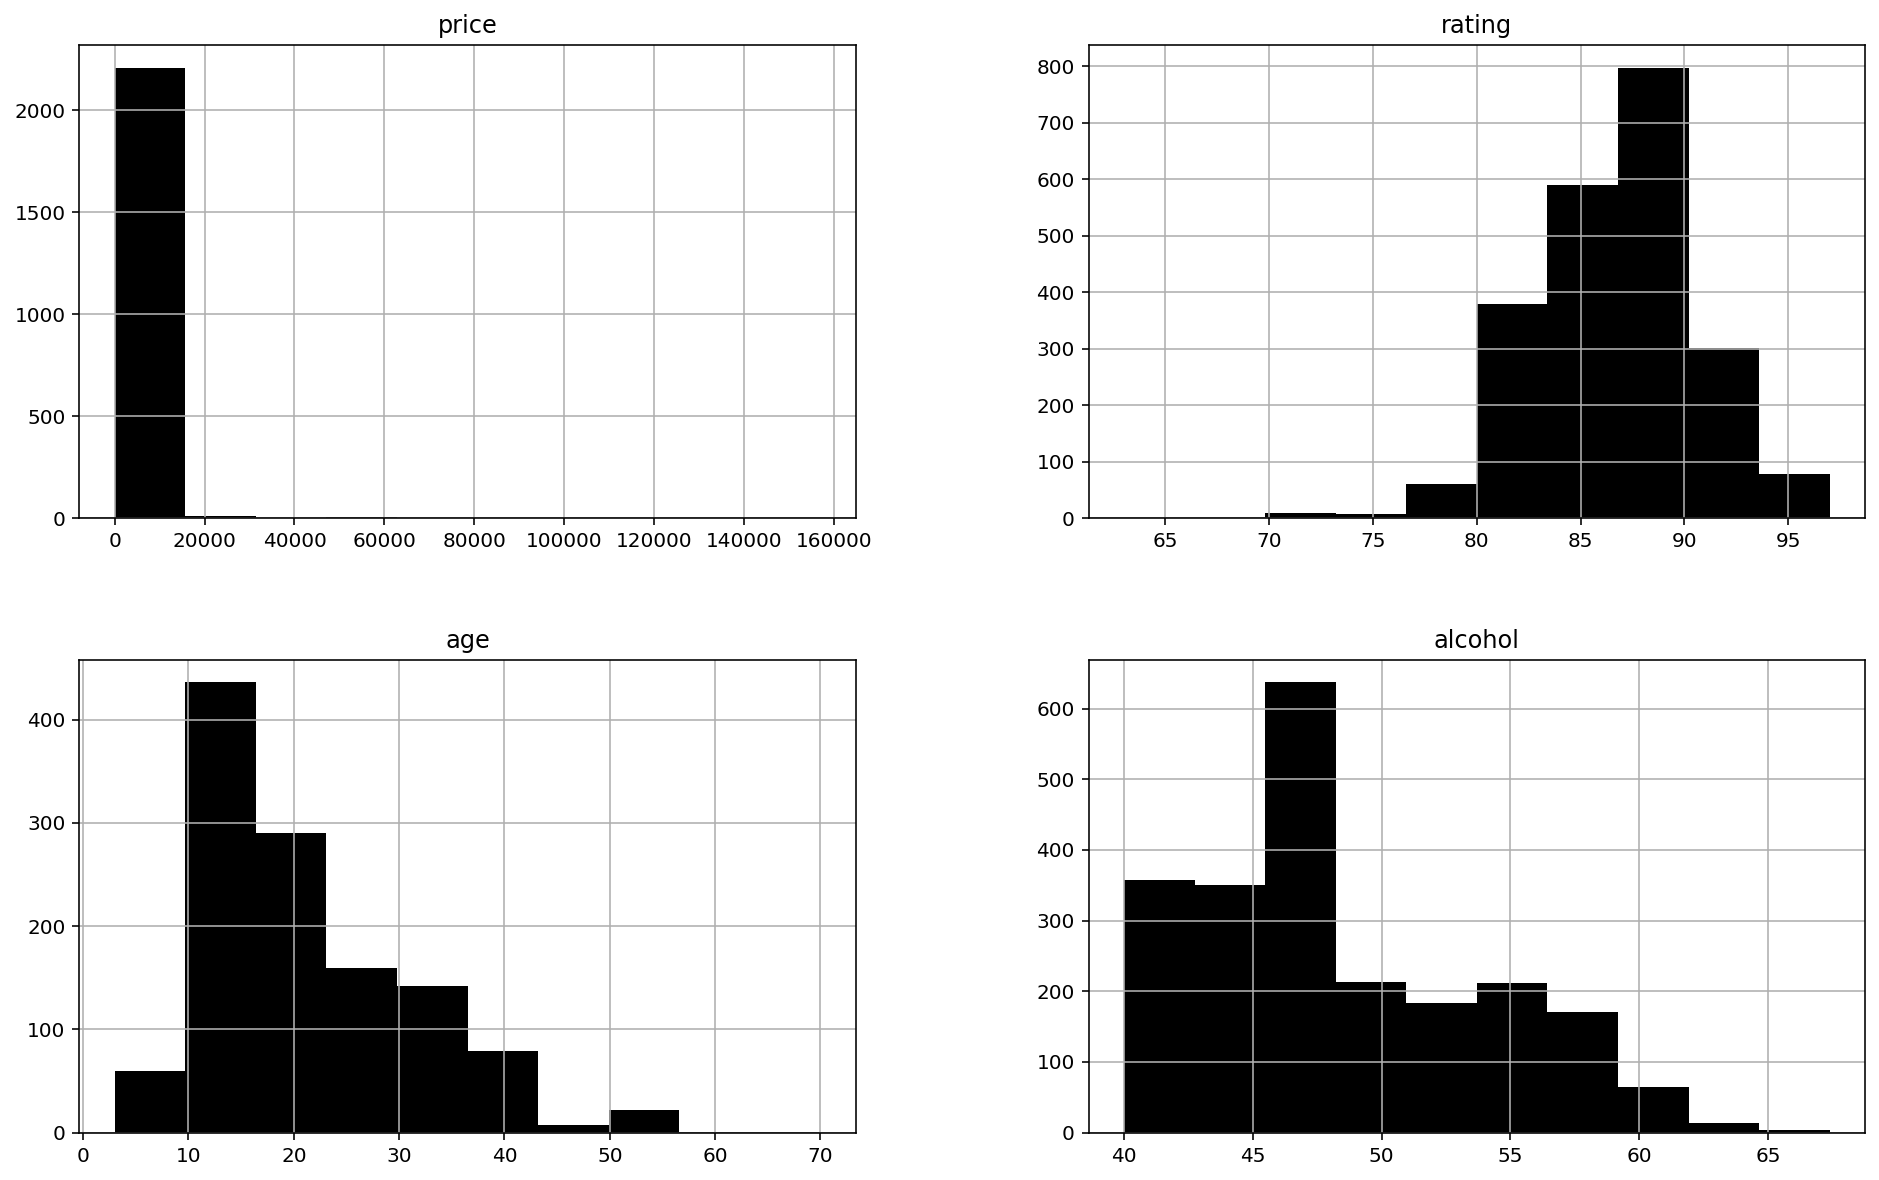

In [28]:
attributes = ['price', 'rating', 'age', 'alcohol']  
wh[attributes].hist(figsize = (16, 10), color = 'Black');

In [29]:
wh.groupby('category').agg(np.mean)


rating    alcohol        age        price
category                                                                
Blended Malt Scotch Whisky  87.660305  46.716794  18.903226   130.263359
Blended Scotch Whisky       87.234450  42.886603  20.360000  1012.904306
Grain Scotch Whisky         86.500000  49.859259  32.222222   272.428571
Single Grain Whisky         85.508772  50.675439  29.229167   219.578947
Single Malt Scotch          86.604283  48.487873  20.537000   663.940026

In [30]:
def visualize_boxplot(wh, cols, group, title):
    """
             A Box plot
    """
    with plt.style.context('fivethirtyeight'):
        wh.boxplot(column=cols, by=group, vert = False, figsize = (13,6), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))
        plt.title(title, fontsize=13, fontweight='heavy')
        plt.show()


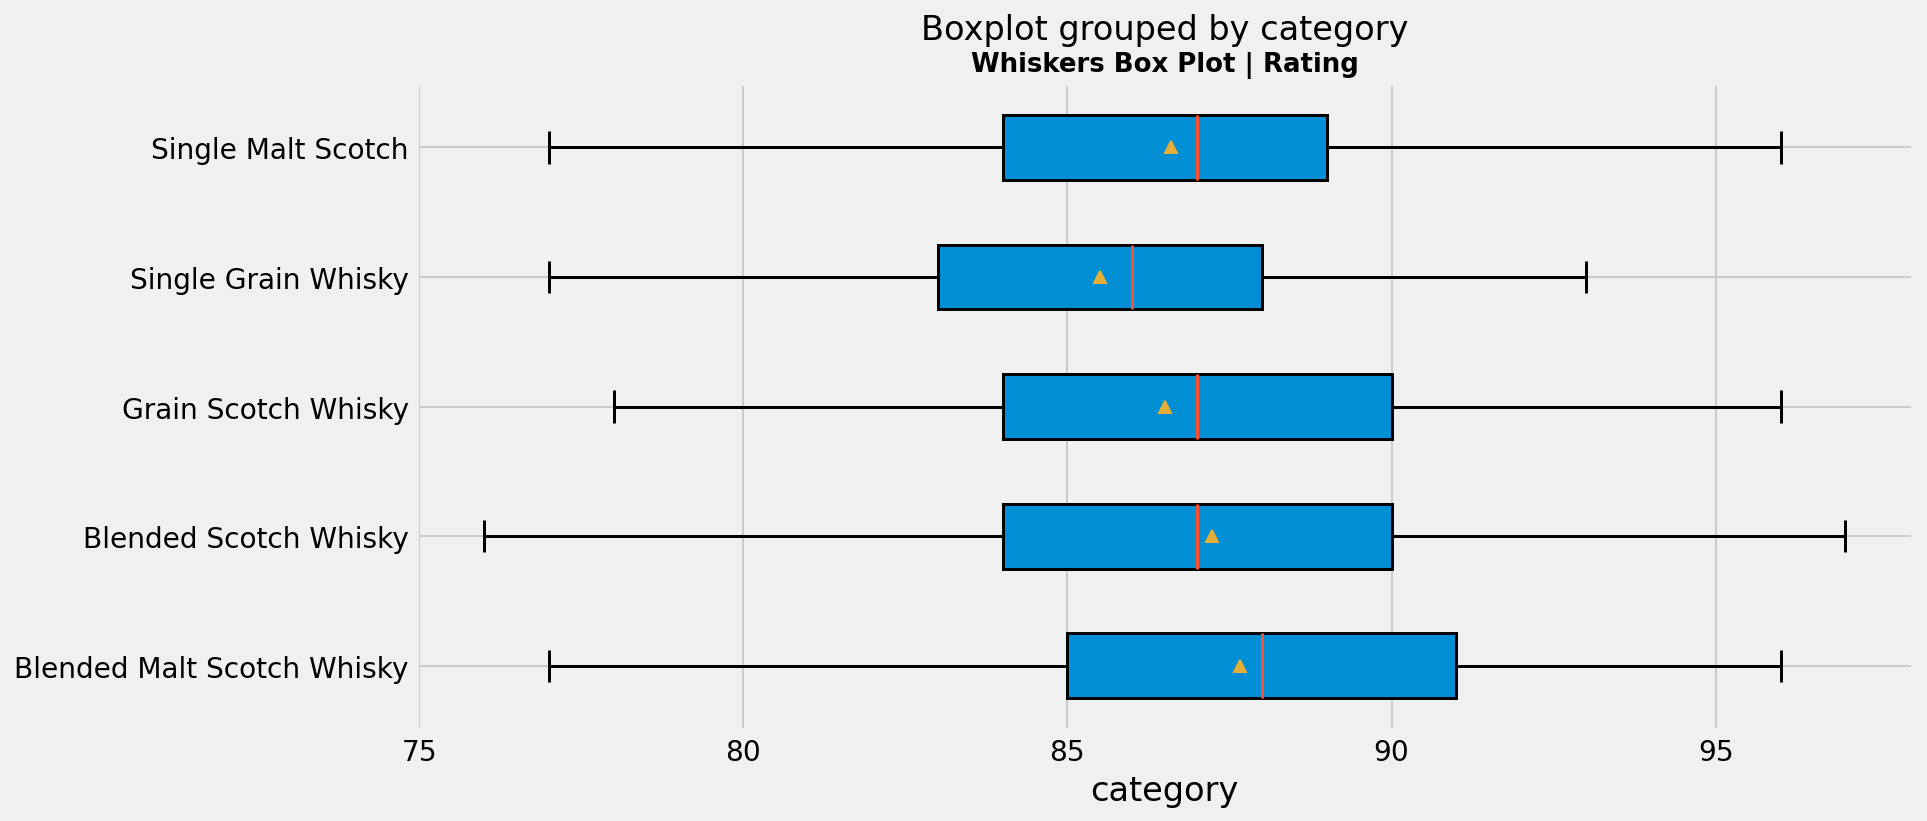

In [31]:
visualize_boxplot(wh, 'rating', 'category', 'Whiskers Box Plot | Rating')


From the above we can see that Blended Malt Scotch Whisky is in the lead in terms of "Rating" and Simple Blended SCotch Whisky is just next to it but there is a huge price difference between both of them.

Also the Median of Blended Malt Scotch whisky is quite above, So the rating of more than 50% of the bottles is above average i.e 87%. This is very good insight that we found.


<br>

### Result

__So from above insight the Vendor may choose Bleneded Malt & Blended Scotch Whisky in their inventory as it may boost there sales mainly due to popularity of the whisky and due to this he may enjoy some handsome profits.__

<br>

### 2.1 Now Lets Create WordCloud 

We can analyse the "Description" columns using Wordclouds.

Also through wordcloud we are going yo analyse first All the Categories then all the cateogries of the whisky seprately.

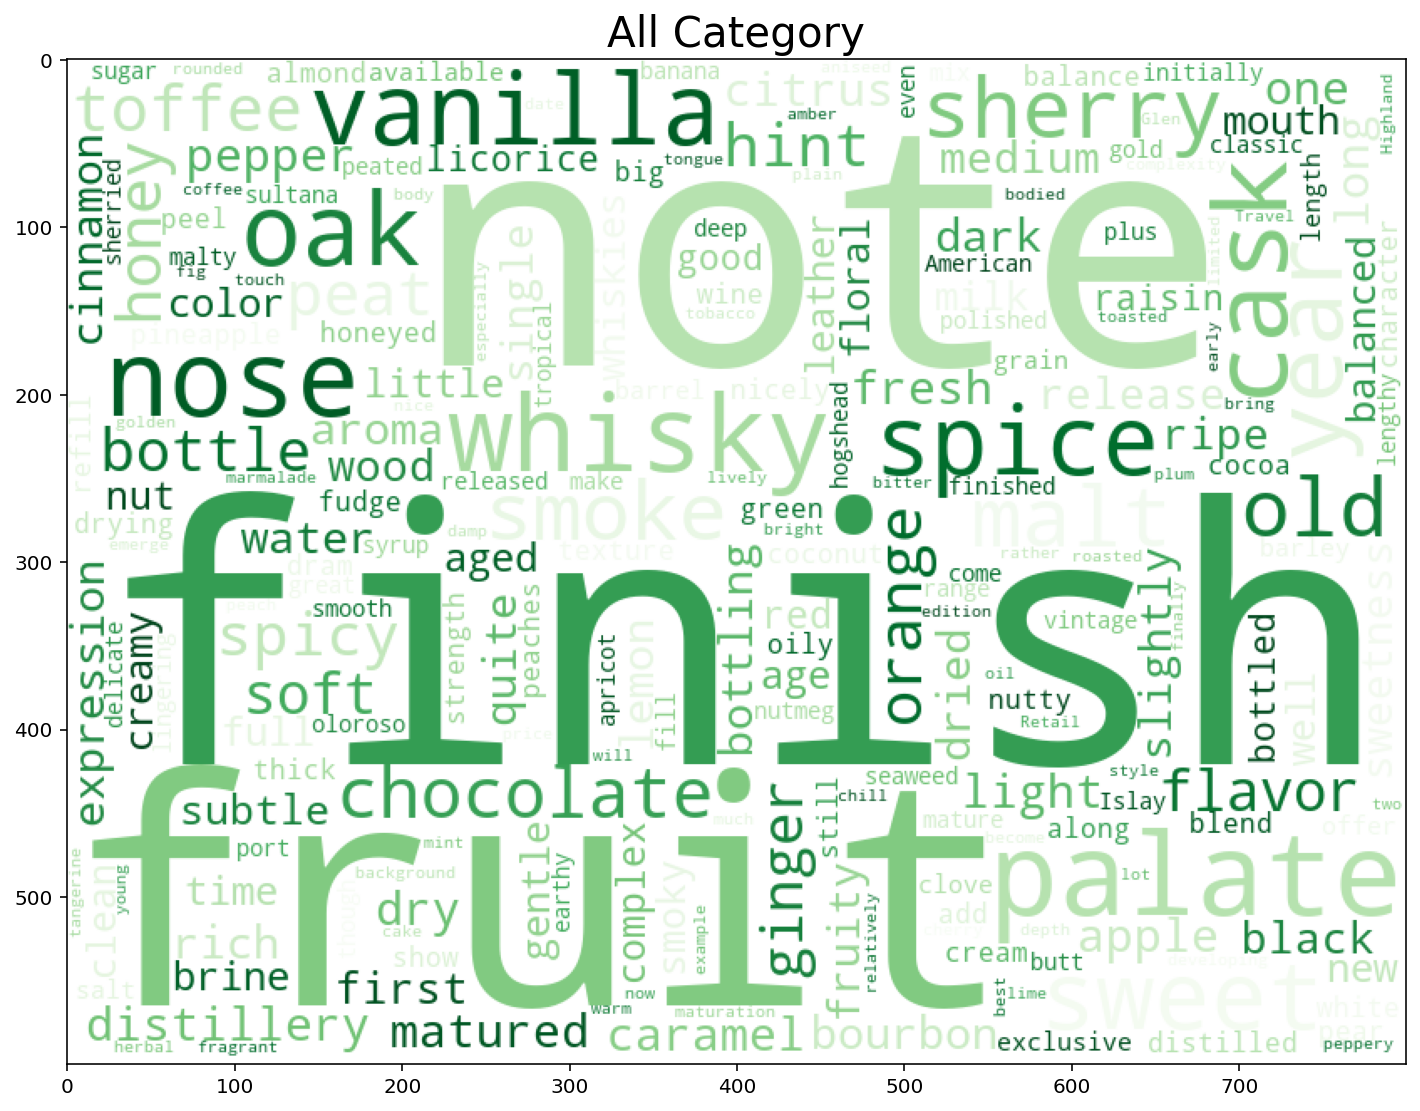

In [32]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=800, height=600, \
                      min_font_size=10, max_words=500, collocations=False, min_word_length=2, colormap="Greens")
wordcloud.generate(" ".join(wh["description"]))

plt.figure(figsize=(12, 12))
plt.title("All Category",fontsize=21)
plt.imshow(wordcloud)
plt.show()

<br>

Now we will analyse the wordcloud of all the categories that we have in the dataset.

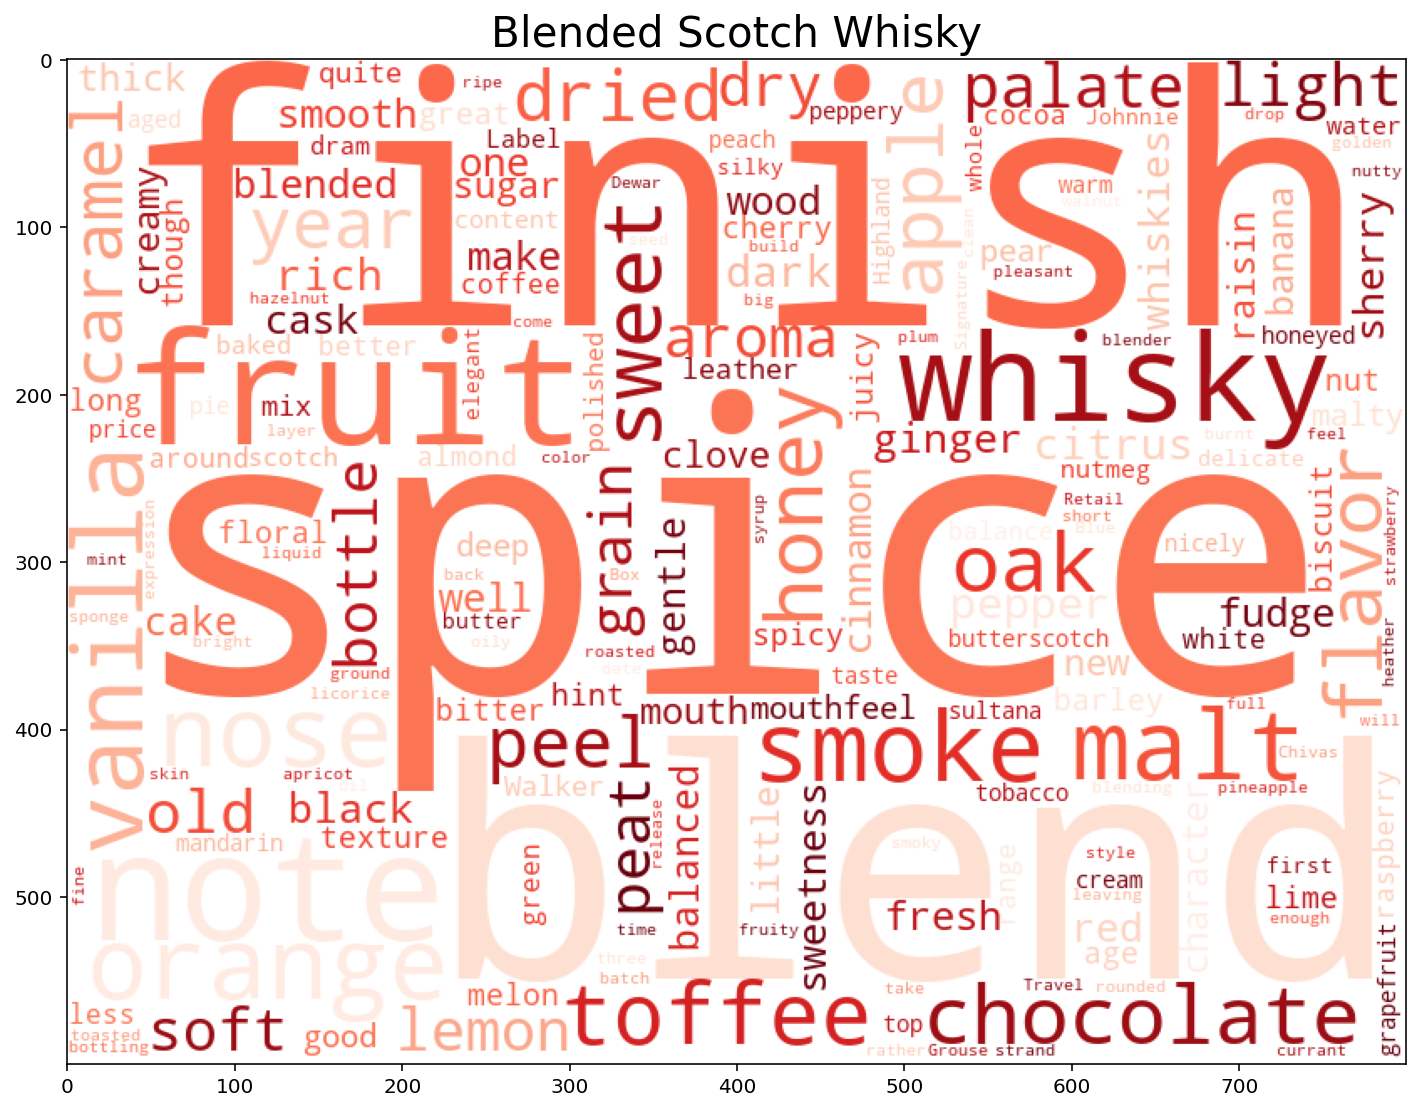

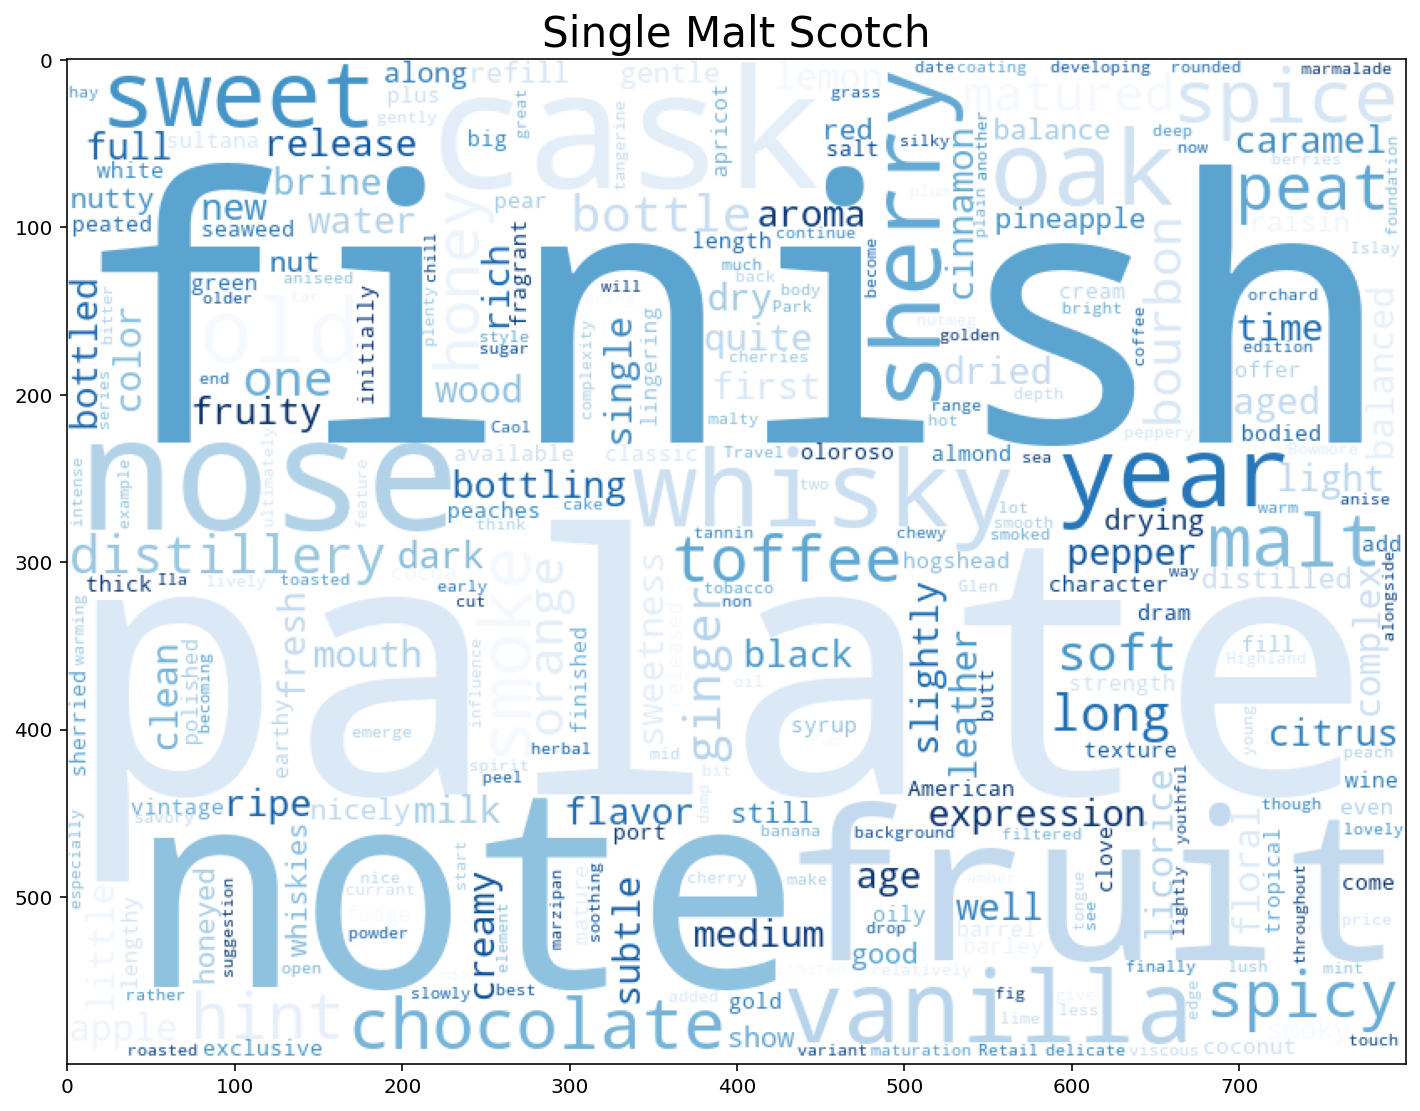

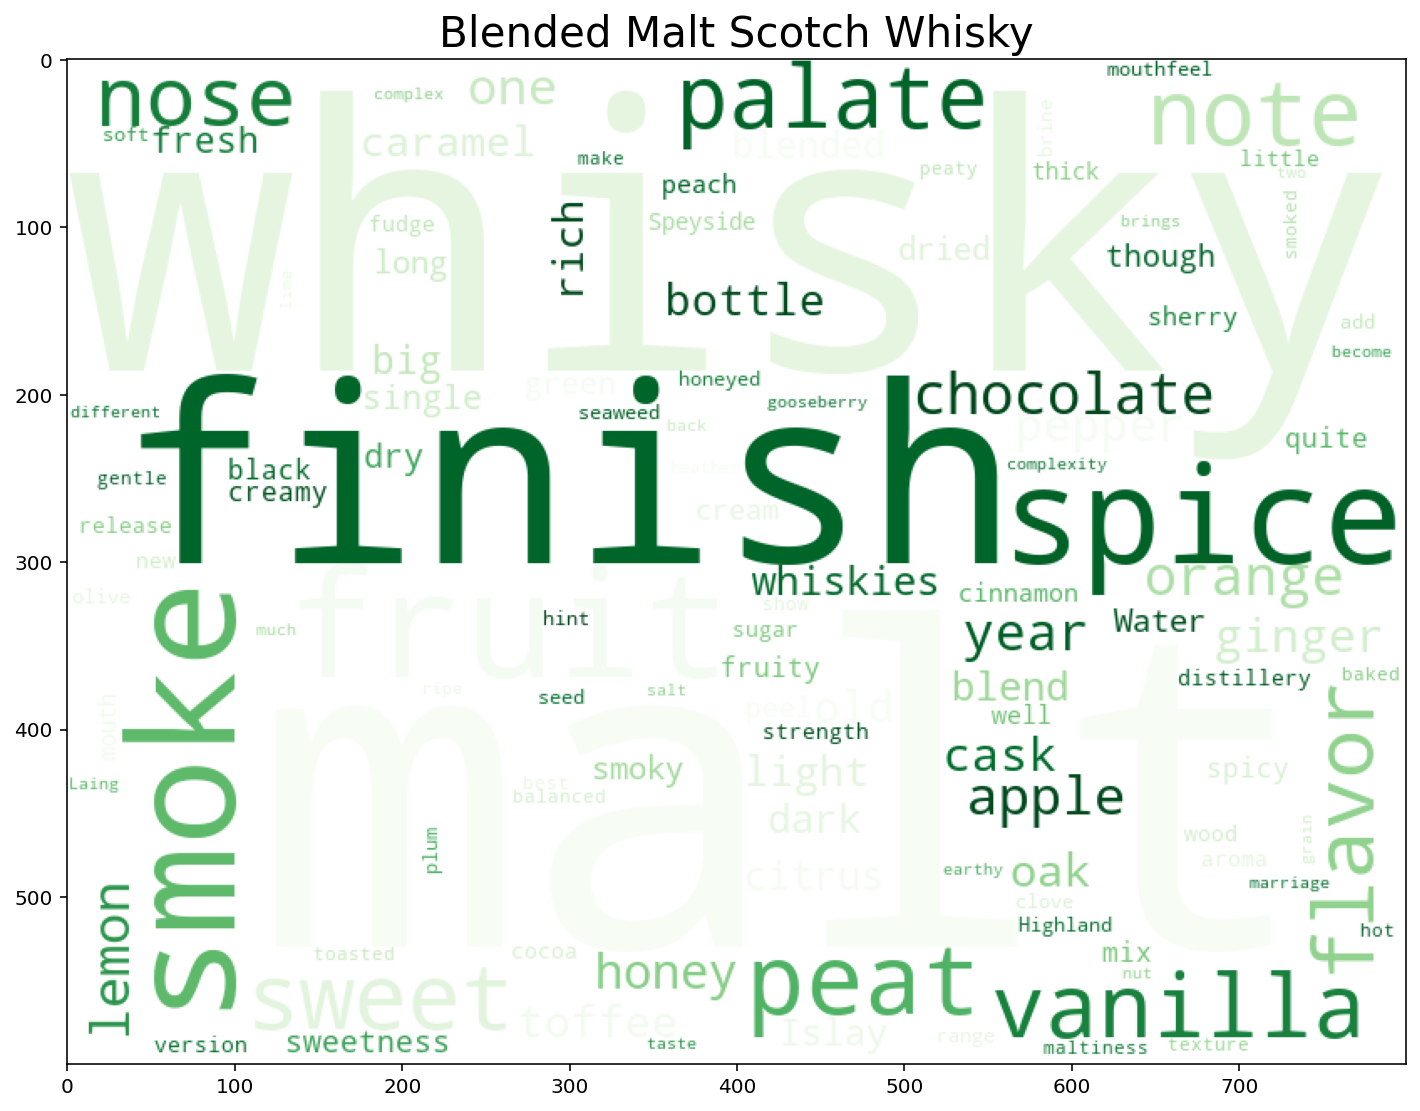

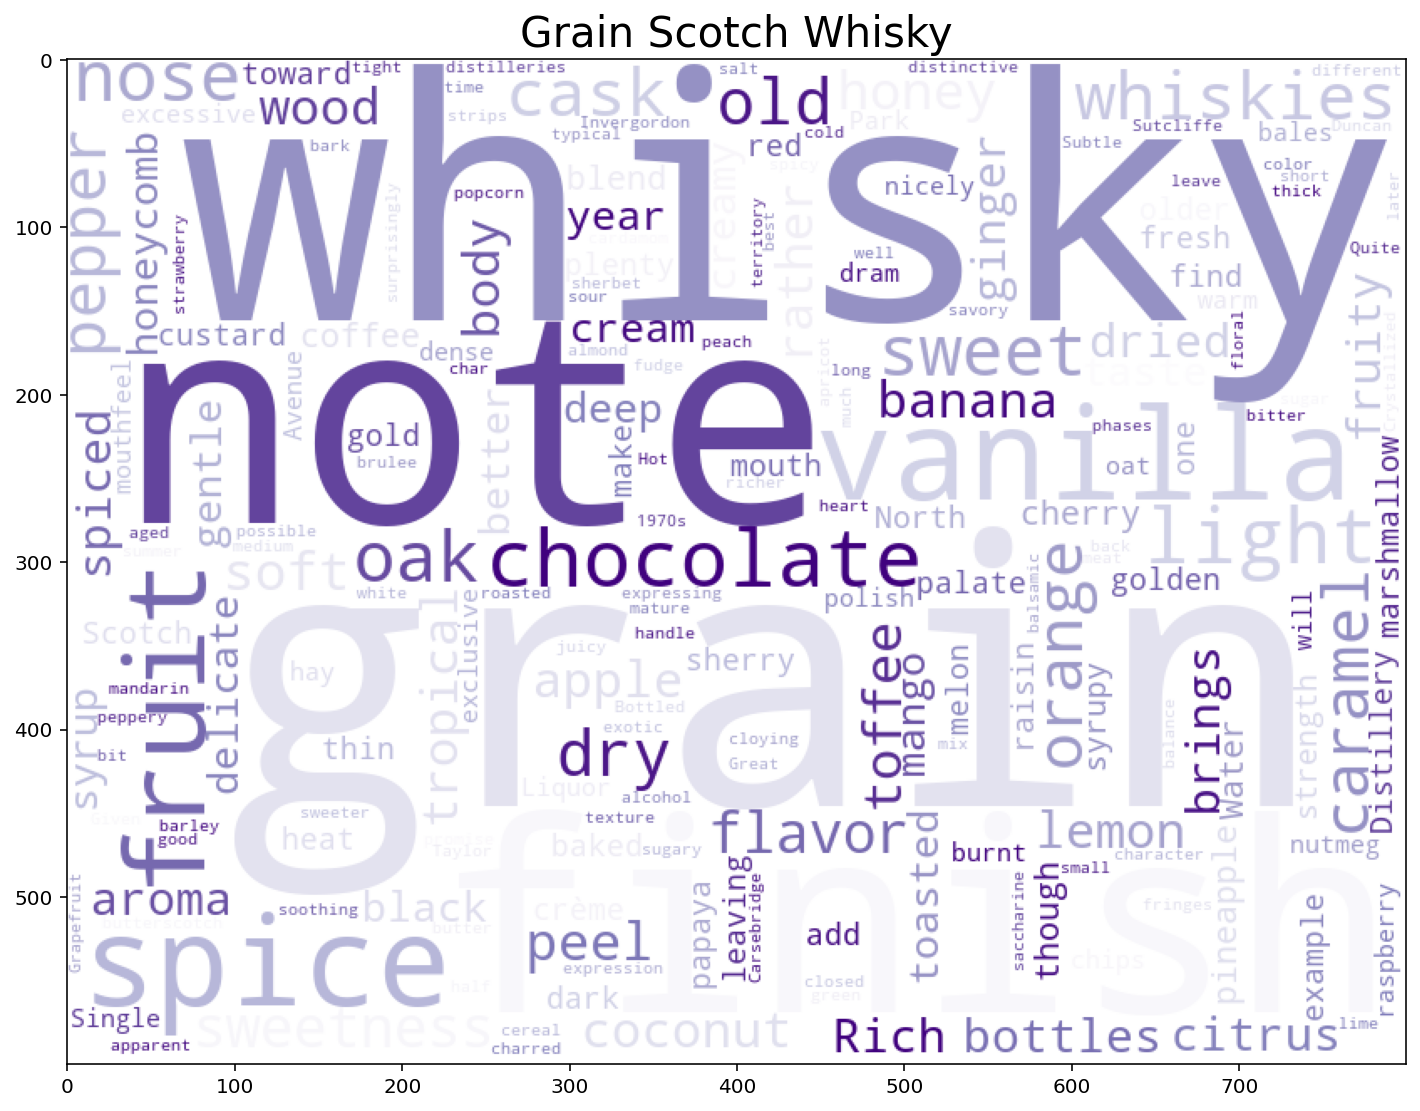

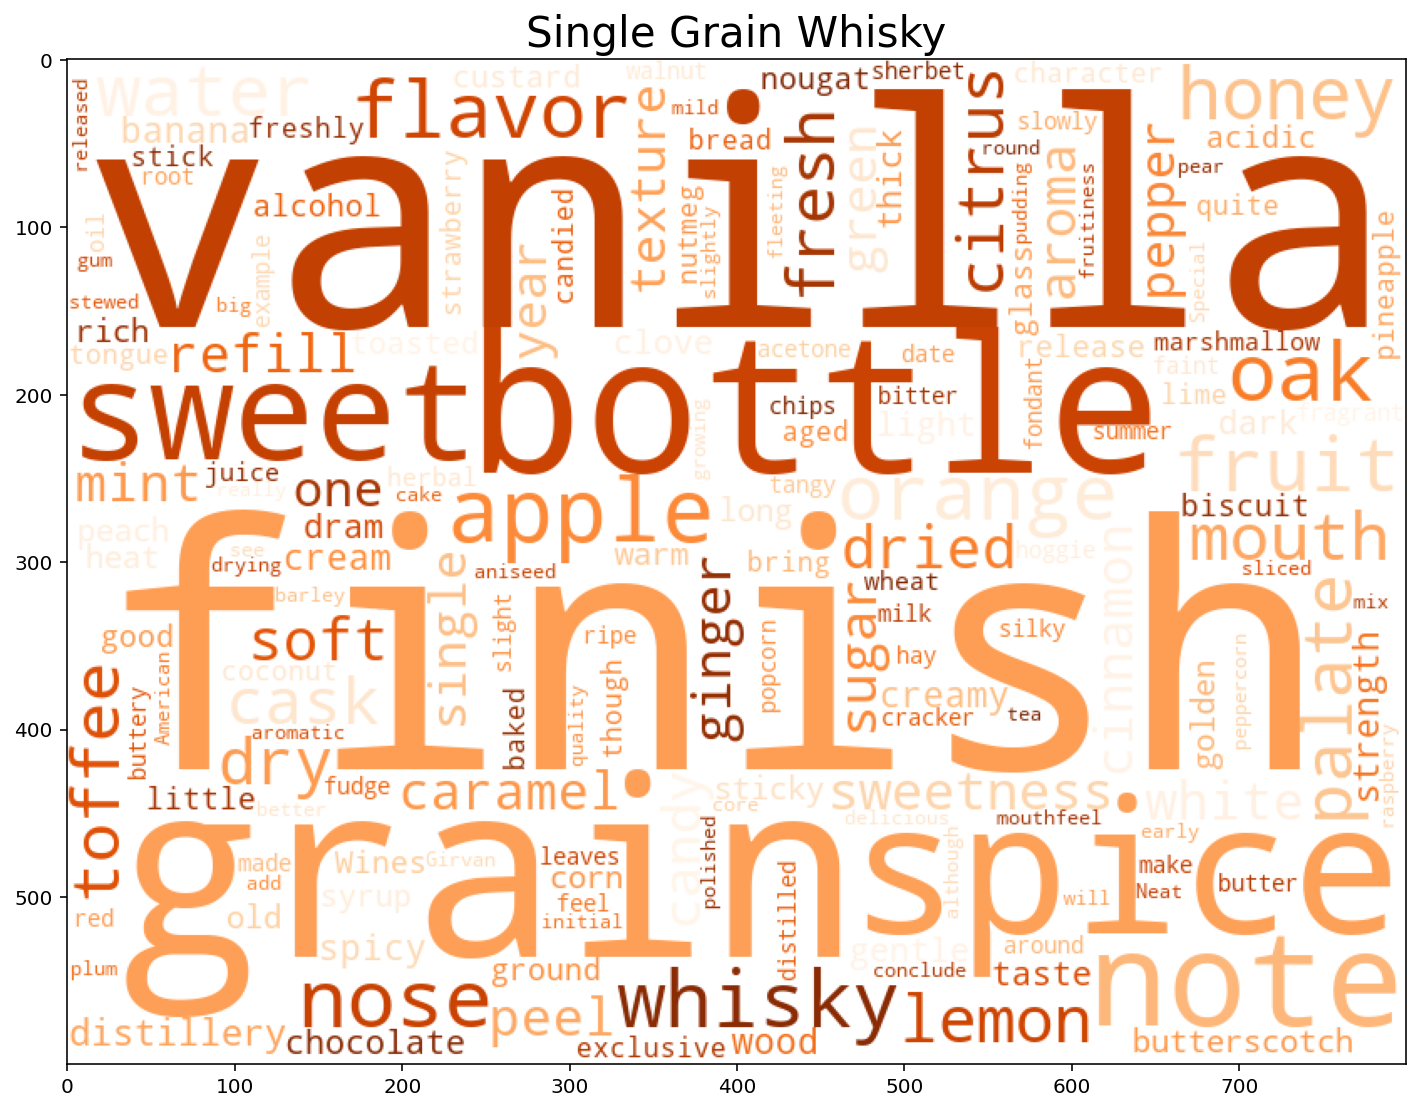

In [33]:
_colors_wc = ["Reds", "Blues", "Greens", "Purples", "Oranges", "Greys"]
for ind, cat in enumerate(wh["category"].unique()):
    wordcloud = WordCloud(background_color='white',width=800, height=600, \
                      min_font_size=10, max_words=500, collocations=False, min_word_length=2, colormap=_colors_wc[ind])
    wordcloud.generate(" ".join(wh[wh["category"]==cat]["description"]))

    plt.figure(figsize=(12, 12))
    plt.title(f"{cat}",fontsize=21)
    plt.imshow(wordcloud)
    plt.show()
    

<br>

## Insights

### - Through wordcloud we found that Most Common tastes for all the categories of Whisky.

__1. Single Malt Whisky- "Spice", "Smoke", "Vanilla", "Chocolate", "Citrus" and lot more.__

__2. Blended Scotch Whisky - "Spice", "Toffee", "Orange", "Ginger", "Citrus" and lot more.__

__3. Grain Scotch Whisky - "Spice", "Vanilla", "Pepper" "Orange", "Cream", "Chocolate" and lot more.__

__4. Blended Malt Scotch Whisky - "Sweet", "Spice", "Orange", "Ginger", "Honey", "Pepper" and lot more.__

__5. Single Grain Whisky - "Spice", "Toffee", "VAnilla", "Apple", "Grain" and lot more.__


___Also we found that "FINISH" of all the categories in the whisky is most important for all the people and this is very much important Insight.___

<br>

### 2.2 Lot More Insights 

__1.Through this data Now we can also find lot of other things, such as which is the highest priced whisky.__

In [34]:
wh.sort_values(by='price', ascending = False)[["name","price",]].head()


name     price
85    Diamond Jubilee by John Walker & Sons, 42.5%  157000.0
1215              Balvenie 2004 13 year old, 58.2%   60000.0
1000              Balvenie 1993 23 year old, 51.9%   60000.0
109                       Dalmore 50 year old, 40%   60000.0
95                Balvenie 1961 55 year old, 41.7%   60000.0

##### From this we can see that Diamond Jubliee by John Walker & Sons is the Highest Priced whisky at $157000 

<br>

__2. Which is the least priced whisky__

In [35]:
wh.sort_values(by='price', ascending = True)[["name","price",]].head()


name  price
2074          Monarch of the Glen, 40%   12.0
970                       Carlyle, 40%   13.0
2167        MacQueen’s 3 year old, 40%   13.0
2227                     Clansman, 40%   14.0
2073  Sir Edward’s Blended Whisky, 40%   14.0

___From this we can see that Moarch of the Glen is leasr priced whisky.___

<br>

__3. Which is the best reviewd whisky bottle?__

In [36]:
wh.sort_values(by = 'rating', ascending = False)[["name","price","rating"]].head()

name    price  rating
0                      Johnnie Walker Blue Label, 40%    225.0    97.0
2         Bowmore 46 year old (distilled 1964), 42.9%  13500.0    97.0
1     Black Bowmore, 1964 vintage, 42 year old, 40.5%   4500.0    97.0
8                     The Dalmore, 50 year old, 52.8%   1500.0    96.0
11  Macallan 1976 Vintage, 29 year old, cask #1135...   1500.0    96.0

___From this we can see that three whisky almost touches the perfect score i.e 97. But the Most affordable out of the three is Johnnie Walker Blue Label.___

__4. Which is the oldest Whisky bottle?__

In [37]:
wh.sort_values(by = 'age', ascending = False)[["name","price","age"]].head()


name    price   age
469   Gordon & MacPhail Generations: The Glenlivet 7...  21000.0  70.0
200   Gordon & MacPhail (distilled at Glen Grant) 60...  12000.0  60.0
2236  The Macallan Lalique Decanter, 55 year old, 40.1%  12000.0  55.0
95                     Balvenie 1961 55 year old, 41.7%  60000.0  55.0
555   Port Dundas 52 year old (Diageo Special Releas...    900.0  52.0

___Gordon & MacPhail Generations:The Glenlivet 7 is the oldest bottle with an age of 70 Years.___


<br>

# 3. Methods 

In this Project we will be using Clustering Algorithms as they can be used to find patterns in the large dataset. We will also be doing predictive case of Logistic regression. In Breif we will be doing following things.


1. K-Means Clusttering

2. Logistic Regression
 


#  3.1 K-Means Clustering (Unsupervised Machine Learning)

 First of all lets start with what is clustering, So Clustering is the process of dividing the entire data into groups which are also known as clusters based on the patterns in the data. Clustering is an Unsupervised machince learning approch to find patterns in the data.

- K-Means Clustering is a centroid clustering model that divides the data into K Groups.

- Here we are going to use the Elbow Method 

##### So Why Elbow Method ?

- Elbow method is used in determing the number of clusters in the Dataset and after finding the optimal Number of Cluster we can Implement K-Means Clustering. 

In [38]:
# Switching to a new data Frame also in this dataframe we will reduce the rows with no nulls
wh_nonulls = wh.dropna().copy()

In [39]:
wh_nonulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 1 to 2246
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1190 non-null   object 
 1   category     1190 non-null   object 
 2   rating       1190 non-null   float64
 3   alcohol      1190 non-null   float64
 4   age          1190 non-null   float64
 5   price        1190 non-null   float64
 6   description  1190 non-null   object 
dtypes: float64(4), object(3)
memory usage: 74.4+ KB


In [40]:
whdata = wh_nonulls[['rating', 'alcohol', 'age']].copy()


In [41]:
max_clusters = 11
wcss = list()

for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1)
    kmeans.fit(whdata)
    wcss.append(kmeans.inertia_)

In [42]:
wcss

[184268.9460386648,
 98804.82098927673,
 72229.3026822409,
 56632.232312034306,
 49090.876812881004,
 43461.426513279905,
 40127.56427971199,
 37180.94585252991,
 34606.97292940246,
 32554.067385940863]

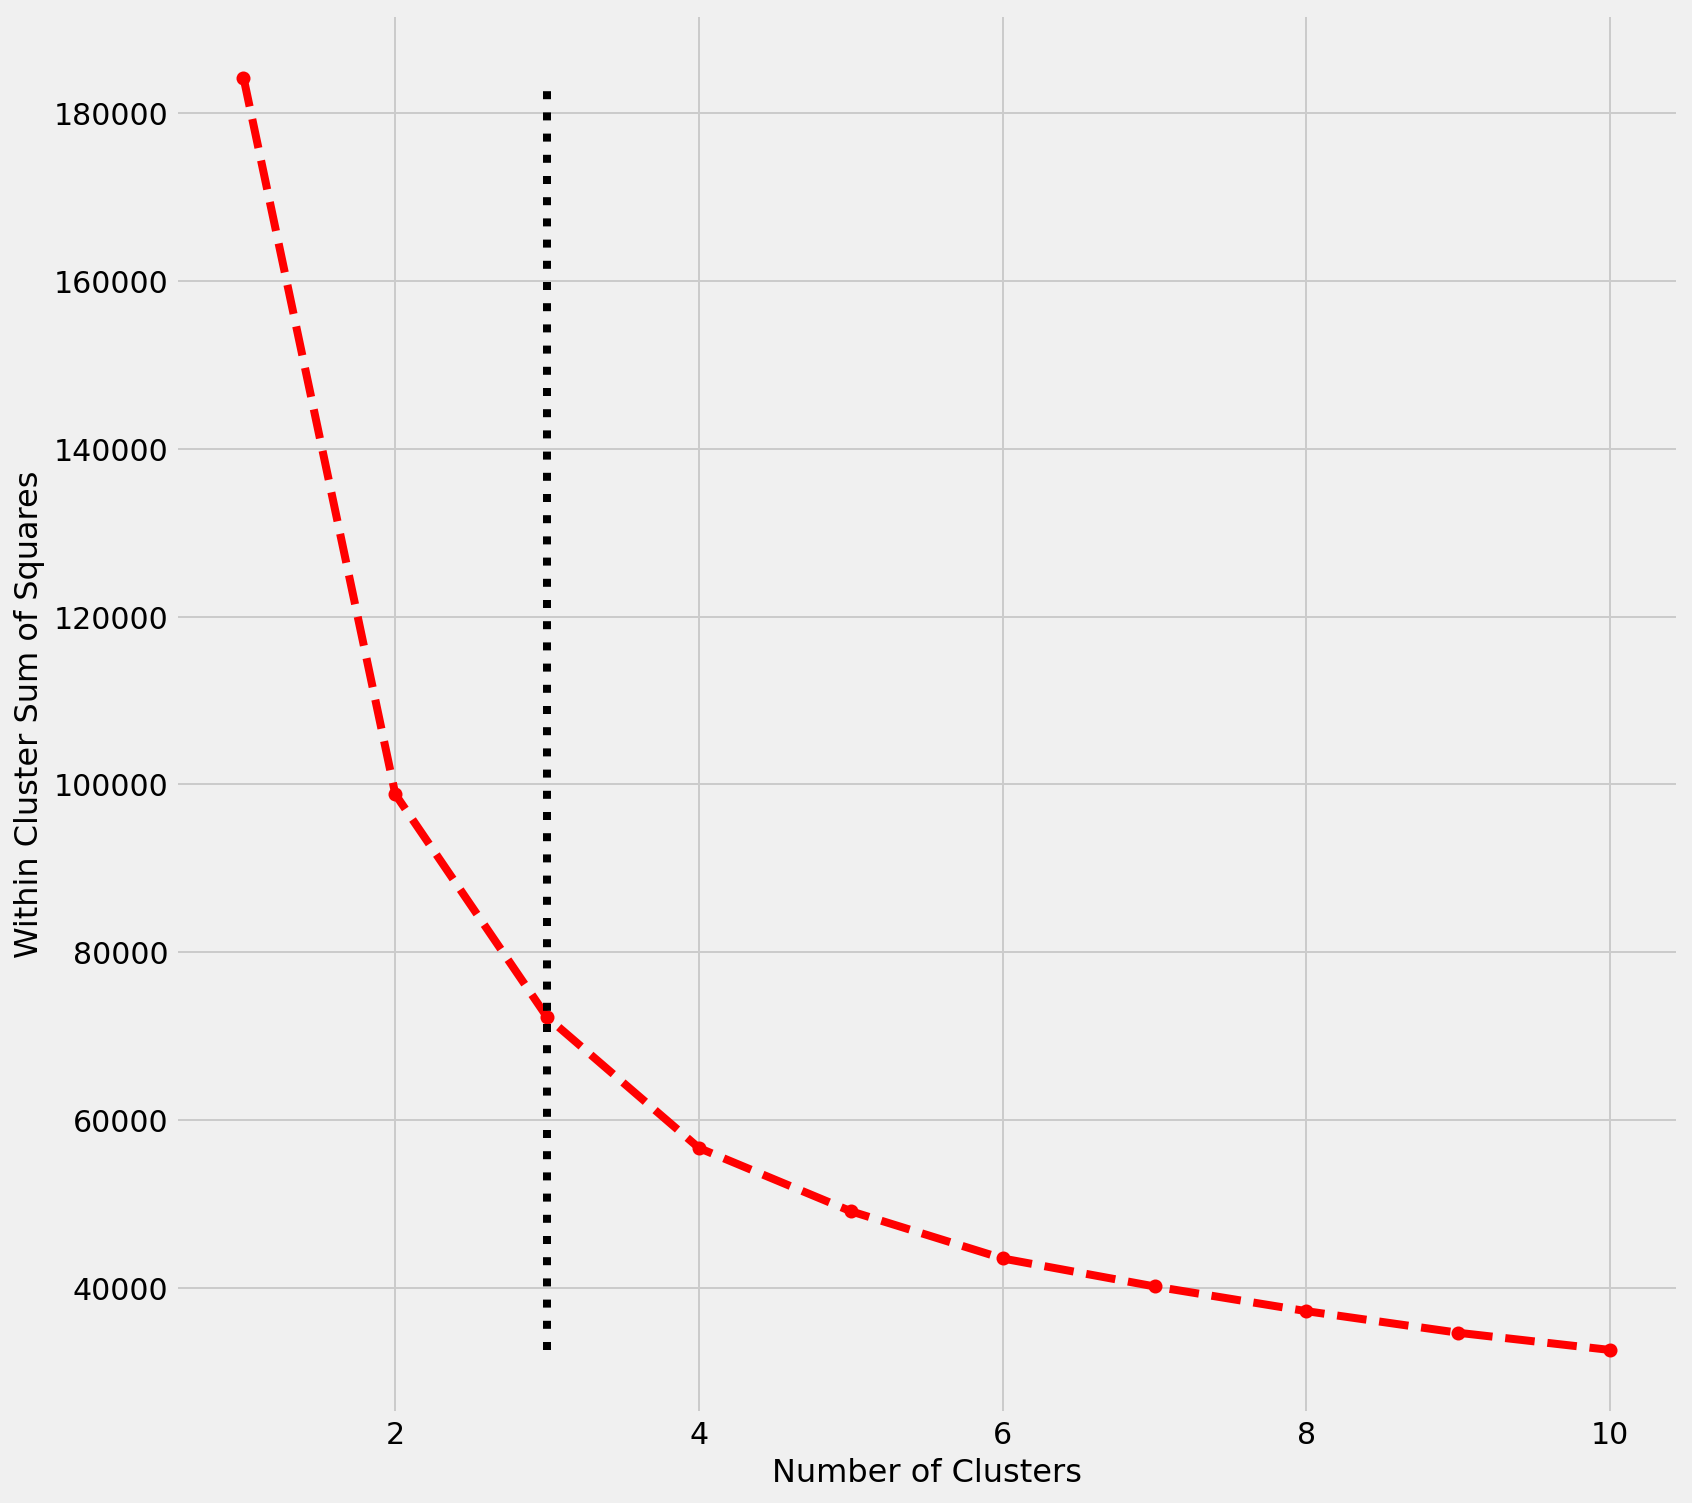

In [43]:
#Time to Visualize the curvve to find the elbow
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize=(12,12))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='Red')
    plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dotted', color='black')
    plt.xlabel('Number of Clusters', fontsize=16)
    plt.ylabel('Within Cluster Sum of Squares', fontsize=16)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()
    


In [44]:
# Let us locate the elbow
m_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal No of clusters:", m_clusters)


Optimal No of clusters: 3


- __Optimal Number of Clusters is 3 (as found from the above), So now we can implement the K-Menas Clustering__

In [45]:
# Implementing the k-Means Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=1)
kmeans.fit_predict(whdata)
wh_nonulls['cluster'] = kmeans.labels_
whdata['cluster'] = kmeans.labels_

In [46]:
wh_nonulls.cluster.value_counts()


0    547
1    365
2    278
Name: cluster, dtype: int64

The Model showed the following clusters and Number of Bottles,
1. Cluster 0 {#547}
2. Cluster 1 {#365}
3. Cluster 2 {#278}

Also we will be inspecting the Box plots, Which is showned below.

In [47]:
def visualize_boxplot(wh, cols, group, title):
    """
             A Box plot
    """
    with plt.style.context('fivethirtyeight'):
        wh.boxplot(column=cols, by=group, vert = False, figsize = (13,6), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))
        plt.title(title, fontsize=15, fontweight='heavy')
        plt.show()


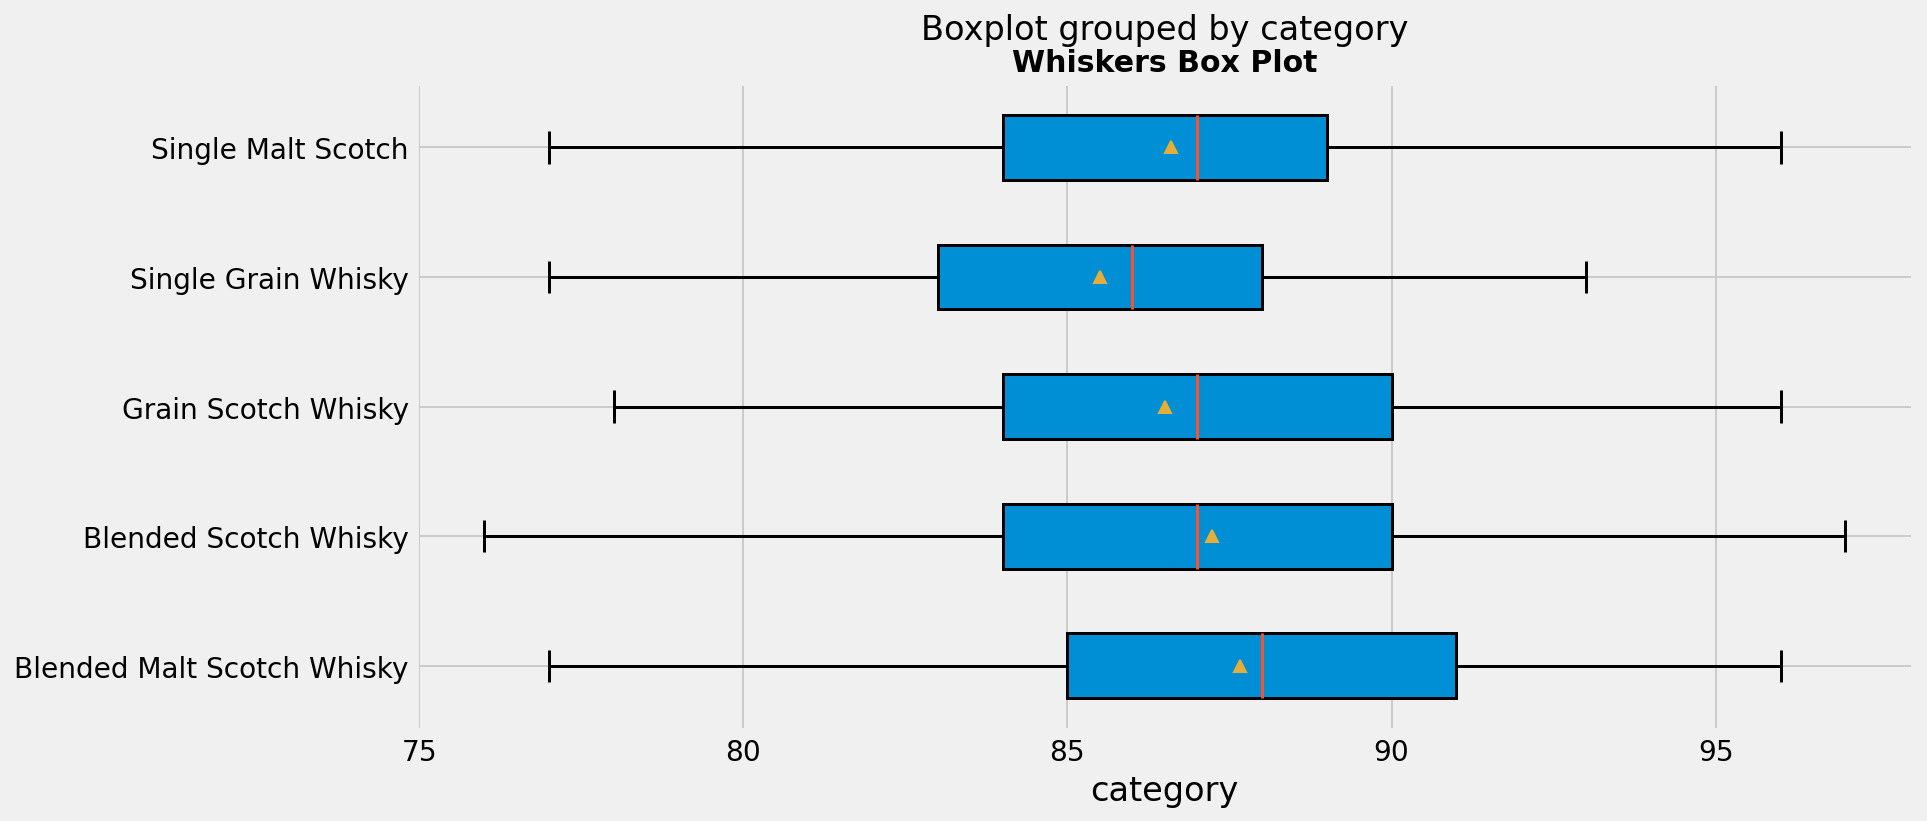

In [48]:
visualize_boxplot(wh, 'rating', 'category', 'Whiskers Box Plot')

- __Through this Box Plot we can see that Single Malt, Blended Scotch and Blended Malt Scotch Whisky has good Rating.__

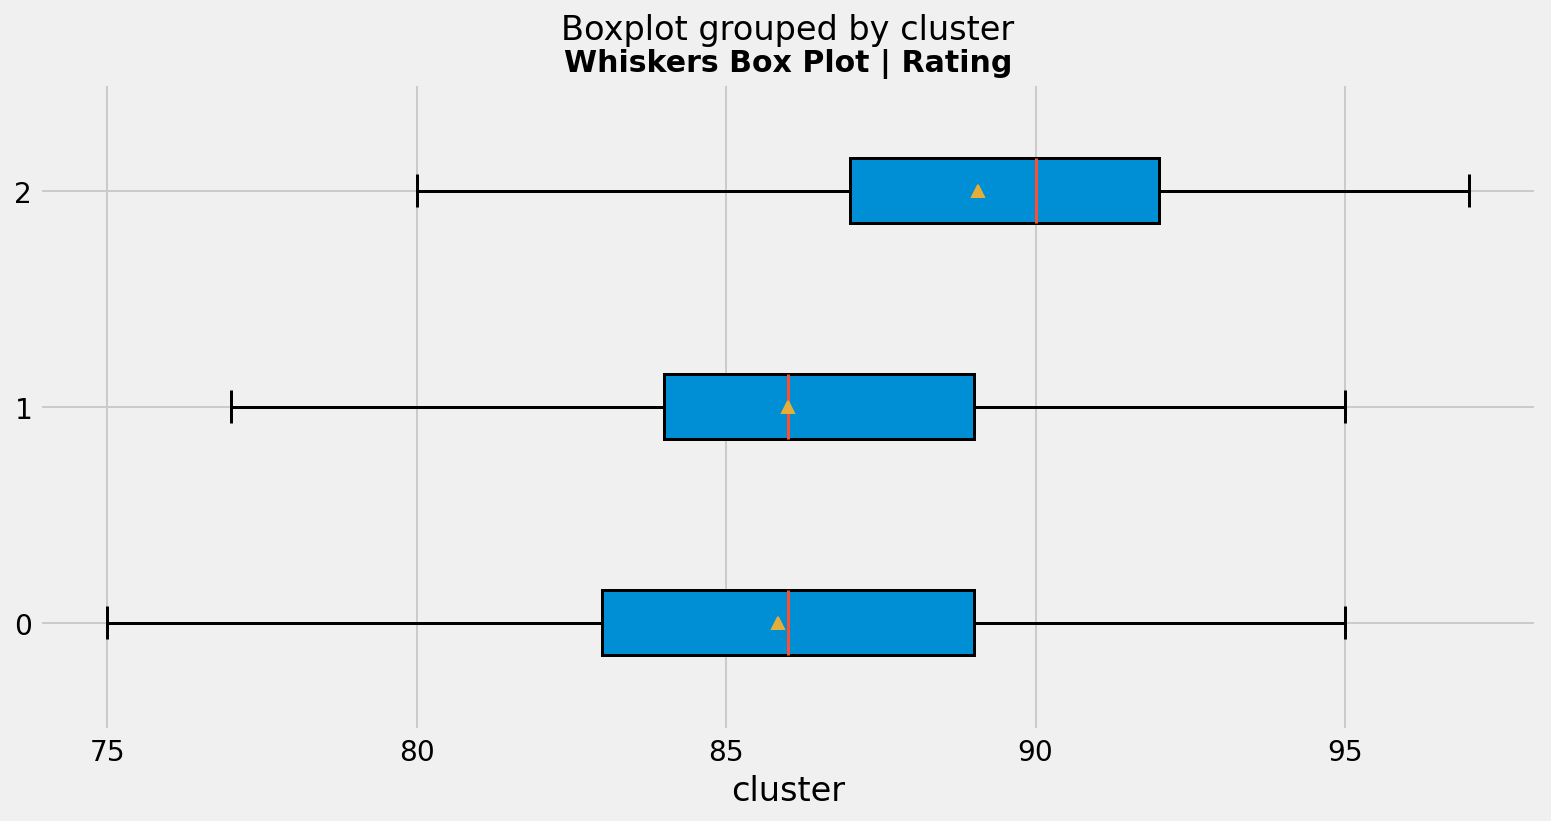

In [49]:
visualize_boxplot(wh_nonulls, 'rating', 'cluster', 'Whiskers Box Plot | Rating')

- __Through this we can see that Cluster 2 has all the bottles which has Good Rating and this can be clearly seen in the above box plot__

- __Also Cluster 0 has all the bottles which are Rated from 75 to 95__

- __As you can see that cluster 2 is much better in terms of Rating. Also you can see that Mean is also ahead of the rest of the clusters but its median is in the right, that means the Bottles overtake even with that good value of 89%__

In [50]:
wh_nonulls['rating'].max()

97.0

In [51]:
wh_nonulls[wh_nonulls['cluster'] == 2].value_counts('category')


category
Single Malt Scotch            226
Blended Scotch Whisky          20
Single Grain Whisky            17
Grain Scotch Whisky            10
Blended Malt Scotch Whisky      5
dtype: int64

In [52]:
wh_nonulls[wh_nonulls['cluster'] == 1].value_counts('category')


category
Single Malt Scotch            325
Single Grain Whisky            25
Grain Scotch Whisky             8
Blended Malt Scotch Whisky      6
Blended Scotch Whisky           1
dtype: int64

In [53]:
wh_nonulls[wh_nonulls['cluster'] == 0].value_counts('category')


category
Single Malt Scotch            442
Blended Scotch Whisky          79
Blended Malt Scotch Whisky     20
Single Grain Whisky             6
dtype: int64

## Results / Insights

<br>

- Clustering is indicating that what type of whiskey has good Rating as well as good Sales
- As you can see that cluster 2 is much better in terms of Rating. Also you can see that Mean is also ahead of the rest of the clusters but its median is in the right, that means the Bottles overtake even with that good value of 89%
- Also Cluster 2 has variety of Different Whisky which includes Single Malt Scotch (#226), Blended Scotch Whisky (#20), Single Grain Whisky(17), Grain Scotch Whisky (#10), Blended Malt Scotch Whisky (#5) ---- thus variety is 100% gauranted!!
- If you check Cluster 0 has everthing in terms of rating it may be good or bad but at the same time it doesnot have varieties of whisky and if you are a vendor you must have a variety of whisky.
- In every cluster you can see the Single Malt whisky is the highest in terms of rating as well as sales so every vendor should have single malt whisky.

In [54]:
#Now Create the 3D Scatter Plot of the Clusters

def Scatter_Plot(wh, num_cluster):
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')
        colors = ['r', 'g', 'b']

        for n in range(num_cluster):
            clusterr_wh = wh[wh['cluster'] == n]
            ax.scatter(clusterr_wh['age'], clusterr_wh['rating'], clusterr_wh['alcohol'], label=n, c=colors[n-1])
            ax.set_xlabel('Age',fontsize=13)
            ax.set_ylabel('Rating', fontsize=12)
            ax.set_zlabel('Alcohol', fontsize=12)
            ax.tick_params(axis="x", labelsize=9)
            ax.tick_params(axis="y", labelsize=9)
            ax.tick_params(axis="z", labelsize=9)
            ax.legend()
        plt.show()

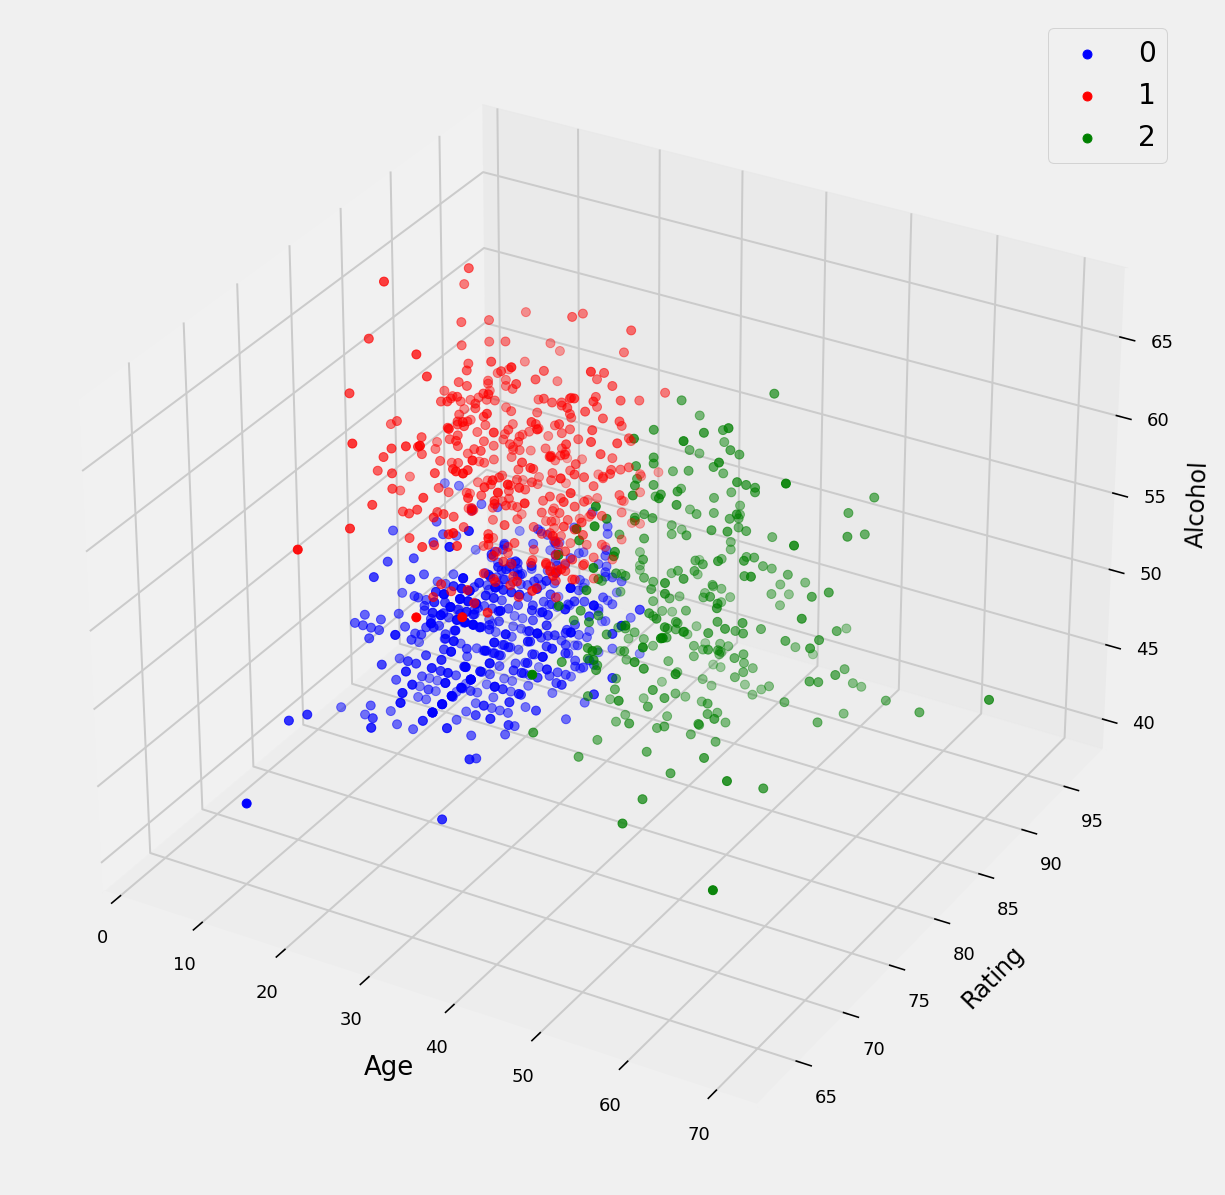

In [55]:
Scatter_Plot(wh_nonulls, 3)


In [56]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2246
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2223 non-null   object 
 1   category     2223 non-null   object 
 2   rating       2223 non-null   float64
 3   alcohol      2206 non-null   float64
 4   age          1197 non-null   float64
 5   price        2223 non-null   float64
 6   description  2223 non-null   object 
dtypes: float64(4), object(3)
memory usage: 138.9+ KB


<br>

### Insights

- We would have not been able to do this if their were more than 3 variable, if it would be more than 3 variables Dimensionality Reduction Proocess such as PCA is necessary. Here Bringing all of them to the same place we were able to visualise the 3D Scatter Plot.

- It is quite easy from the scatter plot that Cluster 2(Green) occupies the higher area of y-axis (Rating).

- We can also see that lot of Alcohol are of same Category of Cluter 1 and Cluster 0.

- Also we can see from this 3D Scatter Plot is that Cluster 2 has some good aged alcohol which has good ratinf as well and old the whisky it is better.

- Overall thorugh this also we come to the same conclusion that Cluster 2 is better in terms of Rating, Age, Alcohol. And if the vendors sells the whisky which is in cluster2 it will boost their sales also with the good ratings that whisky have in cluster 2 it can help the vendor when the customer asks what are its rating.


<br>

# 3.2 Logistic Regression - Supervised Machine Learning

<br>



Logistic Regression is a Statistical analysis method to predict the binary outcome such as Yes or No , 0 or 1, on the basis of observation in the data set.

Logistic Regression is an example of supervised learning .

Now after doing k-means clusttering our dataset is labelled, So now we have 3 clustters and we need to find that which is the cluster that gives a good accuracy, so for that we are opting for one vs all method. In this method we that a single category as True/positive Case and the rest of the group as the false case and this is binary classification model it will return a probability between 0 and 1.

In [57]:
#Lets Start

wh_nonulls2 = wh_nonulls.copy()

In [58]:
wh_nonulls2.shape

(1190, 8)

In [59]:
shufffled_rrow = np.random.permutation(wh_nonulls2.index)
wh_nonulls2 = wh_nonulls2.loc[shufffled_rrow]


In [60]:
X_train = wh_nonulls2.iloc[:int(wh_nonulls2.shape[0]*0.8)].copy()
Y_test = wh_nonulls2.iloc[int(wh_nonulls2.shape[0]*0.8):].copy().reset_index()


In [61]:
trainnn = X_train[['rating', 'alcohol', 'age']].copy()
testtt = Y_test[['rating', 'alcohol', 'age']].copy()


In [62]:
clusterss = X_train['cluster'].unique()
clusterss.sort()

models = {}


In [63]:
for cluster in clusterss:
    X = X_train[['rating', 'alcohol', 'age']].copy()
    y = X_train['cluster'] == cluster
    
    model = LogisticRegression()
    model.fit(X, y)
    models[cluster] = model
    

In [64]:
ap = pd.DataFrame(columns=clusterss)

In [65]:
for cluster in clusterss:
    A_Tesstt = Y_test[['rating', 'alcohol', 'age']].copy()
    ap[cluster] = models[cluster].predict_proba(A_Tesstt)[:,1]


In [66]:
A_Tesstt

rating  alcohol   age
0      86.0     46.0  11.0
1      82.0     43.0  12.0
2      79.0     48.0  16.0
3      84.0     46.0  15.0
4      87.0     46.0  10.0
..      ...      ...   ...
233    89.0     46.6  50.0
234    81.0     52.4  21.0
235    91.0     50.6  25.0
236    89.0     58.1  20.0
237    93.0     43.0  32.0

[238 rows x 3 columns]

In [67]:
Y_test['Cluster_Predictionn'] = ap.idxmax(axis=1)


In [68]:
(Y_test['cluster'] == Y_test['Cluster_Predictionn']).sum()
Y_test.shape


(238, 10)

In [69]:
Accuracy = (Y_test['cluster'] == Y_test['Cluster_Predictionn']).sum() / Y_test.shape[0]


In [70]:
Accuracy

0.9831932773109243

In [71]:
Accuracy*100

98.31932773109243

### Result

##### So we have achieved an Accuracy of 98.31% that means almost 98 out of 100 new Whisky bottles entries will be categorized from Cluster 0, Cluster 1 or Cluster 2 that we have developed from doing k-means clusterring. But to get the exact cluster we need to evaluate the whole thing on a new data but that is the part of the testing.



<br>

<br>

# 4. Final Results

- Firstly we have done Data Pre-processing.

- We have done Basic EDA and we found lot of important Insights which are

- We had started from the basics and found out lot of intersting facts related the world of whisky and some of the important things we found after doing all the methods are:

-  There are intotal of 5 Categories of Whisky which are Single Malt Scotch, Blended Scotch Whisky, Single Grain Whisky, Grain Scotch Whisky, Blended Malt Scotch Whisky.

- For the price attribute, the mean is more than 640 Dollars while the median is only 110.

- ALso the age of the whisky starts from 3Years, Which is the minimum maturation time before the Spirit can be called a SCOTCH WHISKY. (Source :- https://scotchwhisky.com/magazine/ask-the-professor/8033/whisky-and-maturity-why-three-years/ )

- Also the Alcohol Content according to the Scotish Regulation is 40% and according to our data it is also 40%.

- The Important insight that we found through EDA is that Vendor may choose Bleneded Malt & Blended Scotch Whisky in their inventory as it may boost there sales mainly due to popularity of the whisky and due to this he may enjoy some handsome profits

- We also found that Diamond Jubliee by John Walker & Sons is the Highest Priced whisky at $157000 in the entire world.

- We have also used wordclods and found the most common tastes for all the categories of the whisky.

- Also we found that "FINISH" of all the categories in the whisky is most important for all the people and this is very much important Insight.

- Then we used K Means and elbow method and found that optimal number of Clusters are 3.Also we found that Clustering is indicating that what type of whiskey has good Rating as well as good Sales. As you can see that cluster 2 is much better in terms of Rating. Also you can see that Mean is also ahead of the rest of the clusters but its median is in the right, that means the Bottles overtake even with that good value of 89%. Also Cluster 2 has variety of Different Whisky which includes Single Malt Scotch (#226), Blended Scotch Whisky (#20), Single Grain Whisky(17), Grain Scotch Whisky (#10), Blended Malt Scotch Whisky (#5) ---- thus variety is 100% gauranted!!

- We would have not been able to do this if their were more than 3 variable, if it would be more than 3 variables Dimensionality Reduction Proocess such as PCA is necessary. Here Bringing all of them to the same place we were able to visualise the 3D Scatter Plot.

- It is quite easy from the scatter plot that Cluster 2(Green) occupies the higher area of y-axis (Rating).

- We can also see that lot of Alcohol are of same Category of Cluter 1 and Cluster 0.

- Also we can see from this 3D Scatter Plot is that Cluster 2 has some good aged alcohol which has good ratinf as well and old the whisky it is better.

- Overall thorugh this also we come to the same conclusion that Cluster 2 is better in terms of Rating, Age, Alcohol. And if the vendors sells the whisky which is in cluster2 it will boost their sales also with the good ratings that whisky have in cluster 2 it can help the vendor when the customer asks what are its rating.

- Then we used Logistic regression on the same same labelled dataset and we have achieved 98.7% of accuracy that means almost 98 out of 100 new Whisky bottles entries will be categorized to any One of the cluster out of the 3 Clusters. that we have developed from doing k-means clusterring

- But after 3D Scatter plot we can say that Cluster 2 is the optimal cluster.



    


<br>

# Conclusion

__In this report we have reached to the final destination, Starting from using the dataset from the Kaggle which was scrapped from the top Liquor website and also this dataset containing more than 2K+ Review of whisky bottles.__



__We Started from the basics from taking the dataset from the kaggle and then through EDA we found some good insights that we help the company and many other vendors and then we applied K-Means Clustering and we found the optimal no of clusters as well as which is the best cluster in terms of Rating, Age and Price and then we finally used logistic regression on the labelled Dataset and found high accuracy (98.31%) of the cluster into which the new bottles that will registered and this will help the company in boosting their sales. Also, we have done Wordclouds through which we can find what type of taste people prefer when they have their Whisky__

<br>

# Refrences

Please find the below are the Blogs and Post on theoretical concepts and their practical application used in this report.


1. https://www.statista.com/outlook/cmo/alcoholic-drinks/spirits/whisky/worldwide
2. https://www.kaggle.com/datasets/koki25ando/22000-scotch-whisky-reviews - Dataset
3. https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15 -  EDA 
4. https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1 - Kmeans Clusternig
5. https://en.wikipedia.org/wiki/Elbow_method_(clustering) - Elbow Method
6. https://towardsdatascience.com/logistic-regression-b0af09cdb8ad - Logistic Regression

Also some of the concepts of K-means is been taught by the Professor in the lectures and also in the LAB.
